## NBA Data Analysis

**Sandile Shongwe 1236067**

This notebook is on NBA data, it is an exploratory journey into some of the common NBA notions

#### Reading and validating data

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import scipy.stats as stats
%matplotlib inline
%xmode plain
sns.set()

Exception reporting mode: Plain


In [57]:
df = pd.read_csv('Seasons_Stats.csv')
players = pd.read_csv('Players.csv')

In [58]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] #drop unnamed column
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [59]:
#adding player heights from a different file
df = df[pd.isnull(df.Player) == 0]
df['height'] = df.Player.apply(lambda x: players.height[players.Player == x].values[0])
df['weight'] = df.Player.apply(lambda x: players.weight[players.Player == x].values[0])
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,180.0,77.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,188.0,83.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,193.0,86.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0,196.0,88.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,196.0,88.0


In [60]:
tallest = df['height'].max()
df[df.height == tallest].Player.unique()
print("The shortest people in NBA history were", df[df.height == tallest].Player.unique() ," at ", tallest,"cm")

The shortest people in NBA history were ['Manute Bol' 'Gheorghe Muresan']  at  231.0 cm


In [61]:
shortest = df['height'].min()
print("The shortest people in NBA history were", df[df.height == shortest].Player.unique() ," at ", shortest,"cm")

The shortest people in NBA history were ['Muggsy Bogues']  at  160.0 cm


In [62]:
weight = df['weight'].max()
print("The biggest person in NBA history was", df[df.weight == weight].Player.unique(), " and weighed ", weight ,"kg")

The biggest person in NBA history was ['Sim Bhullar']  and weighed  163.0 kg


In [63]:
weight = df['weight'].min()
df[df.weight == weight].Player.unique()
print("The smallest person in NBA history was", df[df.weight == weight].Player.unique(), " and weighed ", weight ,"kg")

The smallest person in NBA history was ['Spud Webb']  and weighed  60.0 kg


In [64]:
#resetting the index
df = df.set_index('Year')
df.head()

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight
Year,,,,,,,,,,,,,,,,,,,,,
1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,...,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,180.0,77.0
1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,...,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,188.0,83.0
1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,...,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,193.0,86.0
1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0,196.0,88.0
1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,196.0,88.0


In [65]:
#A quick describe
df.describe()

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight
count,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,20792.000000,20792.000000,...,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000,24624.000000,24624.000000
mean,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,6.181565,13.708657,...,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350,199.435348,95.523635
std,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,4.872685,6.636402,...,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981,9.367399,12.044301
min,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.000000,60.000000
25%,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,2.600000,8.800000,...,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000,193.000000,86.000000
50%,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,5.400000,12.700000,...,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000,201.000000,95.000000
75%,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,9.000000,18.100000,...,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000,206.000000,104.000000
max,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,100.000000,100.000000,...,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000,231.000000,163.000000


#### We only intend to look at that from 1980 that is because most of the advanced statistics were not recorded prior to that
#### So here we go...

In [66]:
crop_data = df[df.index >= 1980]
crop_data.head()

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight
Year,,,,,,,,,,,,,,,,,,,,,
1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,0.001,...,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,218.0,102.0
1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,0.003,...,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0,201.0,99.0
1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,0.002,...,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0,206.0,95.0
1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,0.023,...,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,185.0,68.0
1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,0.000,...,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0,208.0,106.0


In [67]:
crop_data.tail()

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight
Year,,,,,,,,,,,,,,,,,,,,,
2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,...,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,213.0,108.0
2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,...,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,213.0,114.0
2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,...,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,213.0,108.0
2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,...,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,203.0,97.0
2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,0.013,...,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0,216.0,120.0


## Exploration

Firstly let's have a look at weights and heights of players in the since 1980

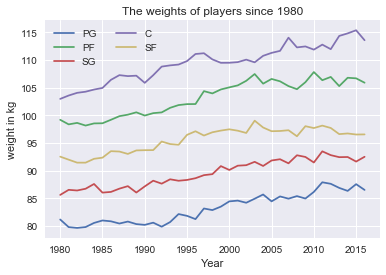

In [68]:
y = []

for j in ['PG','PF','SG', 'C', 'SF']:
    for i in np.arange(1980,2017):
        yrly_data = crop_data.loc[i];
        y.append(yrly_data[yrly_data.Pos == j]['weight'].sum()/yrly_data[yrly_data.Pos == j]['weight'].count())
    plt.plot(np.arange(1980,2017), y)
    y = []
plt.title("The weights of players since 1980")
plt.xlabel("Year")
plt.ylabel("weight in kg")
plt.legend(['PG','PF','SG','C','SF'], ncol=2, loc='upper left');

0.2990086462427954

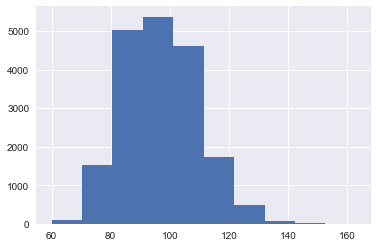

In [69]:
crop_data.loc[1980:2017]['weight'].hist()
stats.skew(crop_data.loc[1980:2017]['weight'])

From the first plot we see that players in the NBA are getting bigger. Also we note that weights of players in the NBA since 1980 seems to be slightly positively skewed, as supported by the the skewness value of 0.299 by the looks of it most players weigh in close to 100kg

All the weights of players in the NBA by position seem to increasing

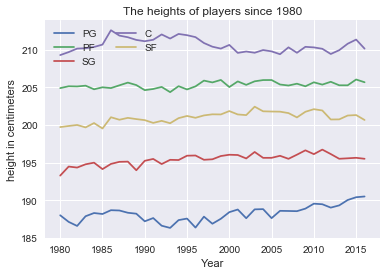

In [70]:
y = []

for j in ['PG','PF','SG', 'C', 'SF']:
    for i in np.arange(1980,2017):
        yrly_data = crop_data.loc[i];
        y.append(yrly_data[yrly_data.Pos == j]['height'].sum()/yrly_data[yrly_data.Pos == j]['height'].count())
    plt.plot(np.arange(1980,2017), y)
    y = []
plt.title("The heights of players since 1980")
plt.xlabel("Year")
plt.ylabel("height in centimeters")
plt.legend(['PG','PF','SG','C','SF'], ncol=2, loc='upper left');

-0.317272260022534

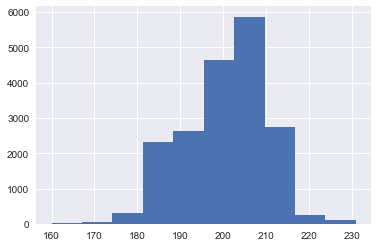

In [71]:
crop_data.loc[1980:2017]['height'].hist()
stats.skew(crop_data.loc[1980:2017]['height'])

The heights of players by position hasn't changed much over the years, but we do notice that Point Guards(PG) are getting taller in recent years. We also note that the heigts are negatively skewed, there are more tall players than shot players and majority of players have had a height of around 210 cm(2.1 m)

Next lets look at the trend(if any) of shooting over the years.

Text(0.5,1,'3s over time')

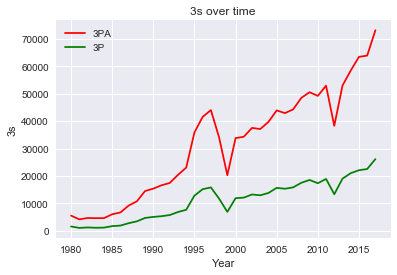

In [72]:
#Since the introduction of the three point line in 1980, have teams been
#attempting more 3s, if so, have then been making more?
tpa = []
tp = []
for i in np.arange(1980,2018):
    tpa.append(np.sum((crop_data[crop_data.index == i*1.0])['3PA']))
    tp.append(np.sum((crop_data[crop_data.index == i*1.0])['3P']))
ax  = plt.axes()
x = np.array(np.arange(1980,2018))
ax.plot(x, np.array(tpa),'-r');
ax.plot(x, np.array(tp),'-g');
ax.set_xlabel("Year")
ax.set_ylabel("3s")
ax.legend(['3PA', '3P'])
ax.set_title("3s over time")

It seems that since 2000 players have been attempting more 3s every year, however they are not making as many of the 3s they attempting as matter of fact the difference between the two is significantly large but because of the law of large numbers the number of 3 point makes is also increasing.

Text(0.5,1,'2s over time')

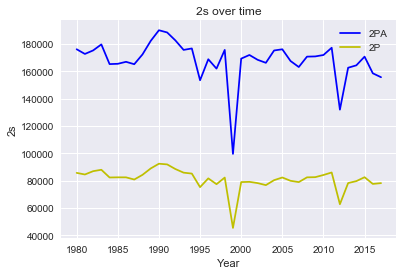

In [73]:
tw_pa = []
tw = []
for i in np.arange(1980,2018):
    tw_pa.append(np.sum((crop_data[crop_data.index == i*1.0])['2PA']))
    tw.append(np.sum((crop_data[crop_data.index == i*1.0])['2P']))
    #     print(i, " ", np.sum((crop_data[crop_data.index == i*1.0])['3PA']))

ax  = plt.axes()
x = np.array(np.arange(1980,2018))
ax.plot(x, np.array(tw_pa),'-b');
ax.plot(x, np.array(tw),'-y');
ax.set_xlabel("Year")
ax.set_ylabel("2s")
ax.legend(['2PA', '2P'])
ax.set_title("2s over time")

The number of 2s attmpted appears not to change much, from the early 2000s they have been showing a decrease. This could be because players are attempting more 3s

The reason for the dips in the stats around 1999 and 2012 appear to because of some trouble within the NBA after reviewing some literature here's what we found.

cited from https://en.wikipedia.org/wiki/2011_NBA_lockout
"The 2011 NBA lockout was the fourth lockout in the history of the National Basketball Association (NBA). The owners began the work stoppage upon expiration of the 2005 collective bargaining agreement (CBA). The 161-day lockout began on July 1, 2011 and ended on December 8, 2011. It delayed the start of the 2011–12 regular season from November 1 to December 25, and it reduced the regular season from 82 to 66 games. The previous lockout in 1998–99 had shortened the season to 50 games. During the lockout, teams could not trade, sign or contact players, and players could not access NBA team facilities, trainers, or staffs."

#### Since the number of 3s taken is rising which positions are mostly responsible for taking 3s?

In [74]:
crop_data['Pos'].unique()

array(['C', 'PF', 'PG', 'SG', 'SF', 'SG-PG', 'SF-SG', 'SG-SF', 'C-PF',
       'PF-C', 'SF-PF', 'PG-SG', 'PF-SF', 'PG-SF', 'SG-PF', 'C-SF'],
      dtype=object)

from our data it seems that there players who played multiple positions are going to have to encode their data in a different way. If we find a player belonging to more than one position we are going to add them to all their mentioned positions

In [75]:
dict = {'C':0, 'PF':0, 'PG':0, 'SG':0, 'SF':0 }
pos_df = pd.Series(dict)
posa_df = pd.Series(dict)

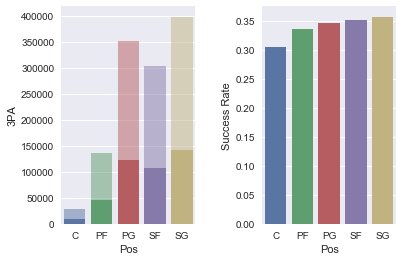

In [76]:
dict = {'C':0, 'PF':0, 'PG':0, 'SG':0, 'SF':0 }
pos_df = pd.Series(dict)
posa_df = pd.Series(dict)

pt = crop_data[['Pos', '3P','3PA']]
pt[pt.Pos == 'C']['3P']
positions = ['C', 'PF', 'PG', 'SF', 'SG', 'SG-PG', 'SF-SG', 'SG-SF', 'C-PF',
       'PF-C', 'SF-PF', 'PG-SG', 'PF-SF', 'PG-SF', 'SG-PF', 'C-SF']
for i in positions:
    ps = i.split('-')
    for j in ps:
        pos_df[j] += sum(pt[pt.Pos == i]['3P'])
        posa_df[j] += sum(pt[pt.Pos == i]['3PA'])

results = pd.DataFrame({'Pos':positions[0:5],'3P':pos_df, '3PA':posa_df})
results['Success Rate'] = results['3P']/(results['3PA'])
results

fig, ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5)
sns.barplot(x='Pos', y='Success Rate', data=results, ax = ax[1])
ax1 = sns.barplot(x='Pos', y='3P', data=results, ax= ax[0])
sns.barplot(x='Pos', y='3PA', data=results, ax = ax1, alpha=0.5)

###### observation
We clearly see that Shooting Guards are the ones that make the most 3s and Centers make the least

Let's look at the 2s as well

In [77]:
dict = {'C':0, 'PF':0, 'PG':0, 'SG':0, 'SF':0 }
pos_df = pd.Series(dict)
posa_df = pd.Series(dict)

pt = crop_data[['Pos', '2P','2PA']]
pt[pt.Pos == 'C']['2P']
positions = ['C', 'PF', 'PG', 'SF', 'SG', 'SG-PG', 'SF-SG', 'SG-SF', 'C-PF',
       'PF-C', 'SF-PF', 'PG-SG', 'PF-SF', 'PG-SF', 'SG-PF', 'C-SF']
for i in positions:
    ps = i.split('-')
    for j in ps:
        pos_df[j] += sum(pt[pt.Pos == i]['2P'])
        posa_df[j] += sum(pt[pt.Pos == i]['2PA'])
results_1 = pd.DataFrame({'Pos':positions[0:5],'2P':pos_df, '2PA':posa_df})
results_1['Success Rate'] = results_1['2P']/(results_1['2PA'])
results_1

,2P,2PA,Pos,Success Rate
C,598897,1191714,C,0.502551
PF,686653,1395754,PF,0.491958
PG,549609,1184208,PG,0.464115
SF,645020,1338591,SF,0.481865
SG,629096,1334902,SG,0.471268


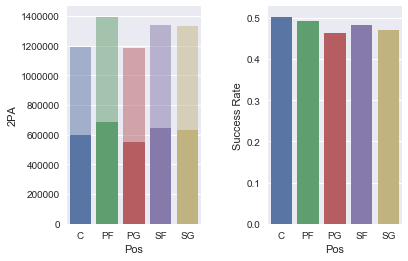

In [78]:
fig, ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5)
sns.barplot(x='Pos', y='Success Rate', data = results_1, ax = ax[1])
ax1 = sns.barplot(x='Pos', y='2P', data = results_1, ax = ax[0])
sns.barplot(x='Pos', y='2PA', data = results_1, ax = ax1, alpha=0.5)

from this plot we that power forwards are the ones making 2-Point shots and point guards are making the least

makes more sense because the bigger guys are closer to the basket.

looking at the plots on 3s and the plots on 2s it seems that small forwards take and make the most shots. We want to look at dynamics of each position, who exactly which position exactly is reponsible for the number of 3s attempted

#### Looking at 3s per year by position

In [79]:
#Loop through the year
#separate the number of 3s taken by position

dict1 = {'C':0, 'PF':0, 'PG':0, 'SG':0, 'SF':0 }
dict2 = {'C':0, 'PF':0, 'PG':0, 'SG':0, 'SF':0 }
# trs_made = pd.Series(dict)
# trs_attempted = pd.Series(dict)
positions = ['C', 'PF', 'PG', 'SF', 'SG', 'SG-PG', 'SF-SG', 'SG-SF', 'C-PF',
       'PF-C', 'SF-PF', 'PG-SG', 'PF-SF', 'PG-SF', 'SG-PF', 'C-SF']
# records = []
for j in np.arange(2000,2018):
    data_by_year = crop_data[crop_data.index == j]
    for i in positions:
        ps = i.split('-')
        for k in ps:
            dict1[k] += sum(data_by_year[data_by_year.Pos == i]['3P'])
            dict2[k] += sum(data_by_year[data_by_year.Pos == i]['3PA'])
    if j == 2000:
            index = [(j,'C'),(j,'PF'),(j,'PG'),(j,'SG'),(j,'SF')]   
            trs_made = (pd.Series(dict1))
            trs_attempted = (pd.Series(dict2))
            trs_attempted.index = index
            trs_made.index = index
            index =  pd.MultiIndex.from_tuples(index)
            trs_made = trs_made.reindex(index)
            trs_attempted = trs_attempted.reindex(index)

            records = pd.DataFrame({'3P':trs_made, '3PA':trs_attempted,'Pos':positions[0:5]})
    else:
        index = [(j,'C'),(j,'PF'),(j,'PG'),(j,'SG'),(j,'SF')]   
        trs_made = (pd.Series(dict1))
        trs_attempted = (pd.Series(dict2))
        trs_attempted.index = index
        trs_made.index = index
        index =  pd.MultiIndex.from_tuples(index)
        trs_made = trs_made.reindex(index)
        trs_attempted = trs_attempted.reindex(index)
#         records = pd.DataFrame({'3P':trs_made, '3PA':trs_attempted})    
        tmp = pd.DataFrame({'3P':trs_made, '3PA':trs_attempted,'Pos':positions[0:5]})
        records =  pd.concat([records, tmp]) 
#records contains a dataframe for each year about the number of 3s attempted and the number made by each position
#now we have to have a line plot
records.head()

3P      3PA Pos
2000 C    100.0    382.0   C
     PF  1217.0   3649.0  PF
     PG  3626.0  10435.0  PG
     SG  3154.0   8832.0  SF
     SF  3824.0  10630.0  SG

In [80]:
d = records.loc[:]
d[d.Pos == 'C']['3P'].values

array([ 100.,  188.,  612.,  762.,  920., 1220., 1285., 1590., 2121.,
       2554., 3038., 3229., 3346., 3467., 4060., 4419., 5106., 6756.])

Text(0.5,1,'3s by position')

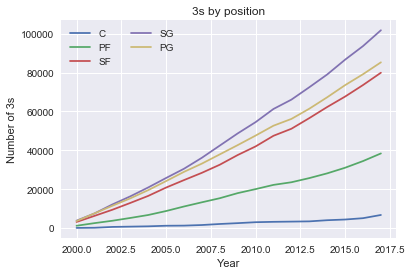

In [81]:
positions = ['C','PF','SF','SG','PG'];
for i in positions:
    plt.plot(np.arange(2000,2018), d[d.Pos == i]['3P'].values)
plt.legend(['C','PF','SF','SG','PG'], ncol=2, loc='upper left');
plt.xlabel("Year")
plt.ylabel("Number of 3s")
plt.title("3s by position")

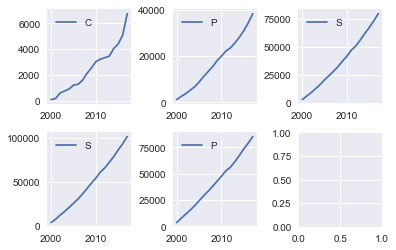

In [82]:
fig, ax = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.3, wspace=0.5)
positions = ['C','PF','SF','SG','PG'];
c = 0;
for i in np.arange(2):
    for j in np.arange(3):
        if c <= 4:
            ax[i,j].plot(np.arange(2000,2018), d[d.Pos == positions[c]]['3P'].values)
            ax[i,j].legend(positions[c])
        c = c + 1

The plots above that show that there is an increase in the number of 3s taken since 2000 is somewhat quadratic. What is interesting to is the plot for the Centers. It seems that the number of 3s they attempted rose even further since around 2012-2013.

#### Deeper look into the impact of the Three-point Shot
Since the beginning of this notebook we have been noticing that there has been a rise in the number of 3s taken by each position. Now we ask a question what is the effect of teams taking more 3s, does it lead to success(success being that they end up higher in the final NBA regular season standings)?

In [83]:
data_2017 = crop_data.loc[2017]
data_2017 = data_2017[data_2017.Tm != 'TOT']
teams = pd.DataFrame({'Tm':data_2017['Tm'].unique(), 'TP':0})
teams = teams.set_index('Tm')
data_2017['Tm'].unique()

array(['OKC', 'DAL', 'BRK', 'SAC', 'NOP', 'MIN', 'SAS', 'IND', 'MEM',
       'POR', 'CLE', 'LAC', 'PHI', 'HOU', 'MIL', 'NYK', 'DEN', 'ORL',
       'MIA', 'PHO', 'GSW', 'CHO', 'DET', 'ATL', 'WAS', 'LAL', 'UTA',
       'BOS', 'CHI', 'TOR'], dtype=object)

The number of unique teams in the NBA

Lets look for 16 team that shot the most 3s in the 2016-2017 regular season

In [84]:
for i in (data_2017.Tm.unique()):
    teams.loc[i] = np.sum(np.sum(data_2017[data_2017.Tm == i]['3P']))/np.sum(np.sum(data_2017[data_2017.Tm == i]['3PA']))
teams = teams.sort_values('TP', ascending=False)
teams['teams'] = teams.index
league_avep = np.mean(teams.TP.values)

for i in (data_2017.Tm.unique()):
    teams.loc[i] = np.sum(np.sum(data_2017[data_2017.Tm == i]['3P']))
league_avea = np.mean(teams.TP.values)
above_ave = teams[teams.TP >= league_avea]
above_ave['teams'] = above_ave.index
print("The league average in terms of 3s for 2017: ", league_avep*100, "%  3 points team average ", league_avea ," percentage ", league_avep)


The league average in terms of 3s for 2017:  35.714887396105624 %  3 points team average  791.6  percentage  0.35714887396105627


C:\Users\Sandile\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [85]:
#this code was adapted from a stackoverflow  answer listed here:
#https://stackoverflow.com/questions/29212955/how-to-convert-pipe-separated-text-file-to-csv/29213175
def convert_to_csv(filename):
    with open(filename+".txt", "r") as file_pipe:
        reader_pipe = csv.reader(file_pipe, delimiter=',')
        with open(filename+".csv", 'w') as file_comma:
            writer_comma = csv.writer(file_comma, delimiter=',')
            writer_comma.writerows(reader_pipe)

In [86]:
convert_to_csv('1617_standings')
standings = pd.read_csv('1617_standings.csv')
standings.head()

,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
0,1,Golden State Warriors,67-15,36-5,31-10,25-5,42-10,9-1,8-2,8-2,...,20-6,3-4,48-6,2-1,14-1,13-3,12-2,9-3,12-4,5-1
1,2,San Antonio Spurs,61-21,31-10,30-11,25-5,36-16,9-1,8-2,8-2,...,18-8,8-5,30-8,4-0,11-4,12-2,10-5,8-2,13-4,3-4
2,3,Houston Rockets,55-27,30-11,25-16,19-11,36-16,8-2,5-5,6-4,...,15-9,8-3,30-11,2-1,9-6,15-2,10-7,6-3,9-6,4-2
3,4,Boston Celtics,53-29,30-11,23-18,36-16,17-13,11-5,11-7,14-4,...,16-9,7-6,17-11,2-1,8-7,10-6,10-4,8-4,11-5,4-2
4,5,Cleveland Cavaliers,51-31,31-10,20-21,35-17,16-14,16-2,8-8,11-7,...,12-15,3-4,25-15,3-0,10-3,12-4,7-8,9-2,7-10,3-4


In [87]:
mix = pd.merge(above_ave, teams, how='inner', on=['TP'])
pd.concat([pd.Series(standings[0:16]['Team'].values), mix['teams_x']], axis=1)

,0,teams_x
0,Golden State Warriors,CLE
1,San Antonio Spurs,GSW
2,Houston Rockets,POR
3,Boston Celtics,LAC
4,Cleveland Cavaliers,DEN
5,Los Angeles Clippers,MIA
6,Toronto Raptors,BOS
7,Utah Jazz,HOU
8,Washington Wizards,DAL
9,Oklahoma City Thunder,CHO


## observation

It turns out even if a team makes an above league average amount of 3s and shooting at an above average % it doesn't necessarily guarantee them a spot in the playoffs.

## More exploration...

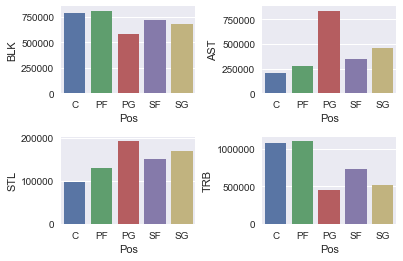

In [88]:
#looking for the number of assists by each position

fig, ax =plt.subplots(2,2)
pt = crop_data[['Pos', 'BLK']]
positions = ['C', 'PF', 'PG', 'SF', 'SG', 'SG-PG', 'SF-SG', 'SG-SF', 'C-PF',
   'PF-C', 'SF-PF', 'PG-SG', 'PF-SF', 'PG-SF', 'SG-PF', 'C-SF']
for i in positions:
    ps = i.split('-')
    for j in ps:
        pos_df[j] += sum(pt[pt.Pos == i]['BLK'])
results = pd.DataFrame({'Pos':positions[0:5],'BLK':pos_df})
results
ax1 = sns.barplot(x='Pos', y='BLK', data=results, ax = ax[0][0])
fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(hspace=0.5)

dict = {'C':0, 'PF':0, 'PG':0, 'SG':0, 'SF':0 }
pos_df = pd.Series(dict)
posa_df = pd.Series(dict)

pt = crop_data[['Pos', 'AST']]
positions = ['C', 'PF', 'PG', 'SF', 'SG', 'SG-PG', 'SF-SG', 'SG-SF', 'C-PF',
   'PF-C', 'SF-PF', 'PG-SG', 'PF-SF', 'PG-SF', 'SG-PF', 'C-SF']
for i in positions:
    ps = i.split('-')
    for j in ps:
        pos_df[j] += sum(pt[pt.Pos == i]['AST'])
results = pd.DataFrame({'Pos':positions[0:5],'AST':pos_df})
results
ax1 = sns.barplot(x='Pos', y='AST', data=results, ax=ax[0][1])

dict = {'C':0, 'PF':0, 'PG':0, 'SG':0, 'SF':0 }
pos_df = pd.Series(dict)
posa_df = pd.Series(dict)
# ax1 = sns.barplot(x='Pos', y='STL', data=results, ax = ax[2])
# fig.subplots_adjust(wspace=0.5)
pt = crop_data[['Pos', 'STL']]
positions = ['C', 'PF', 'PG', 'SF', 'SG', 'SG-PG', 'SF-SG', 'SG-SF', 'C-PF',
   'PF-C', 'SF-PF', 'PG-SG', 'PF-SF', 'PG-SF', 'SG-PF', 'C-SF']
for i in positions:
    ps = i.split('-')
    for j in ps:
        pos_df[j] += sum(pt[pt.Pos == i]['STL'])
results = pd.DataFrame({'Pos':positions[0:5],'STL':pos_df})
results
ax1 = sns.barplot(x='Pos', y='STL', data=results, ax=ax[1][0])

dict = {'C':0, 'PF':0, 'PG':0, 'SG':0, 'SF':0 }
pos_df = pd.Series(dict)
posa_df = pd.Series(dict)


pt = crop_data[['Pos', 'TRB']]
positions = ['C', 'PF', 'PG', 'SF', 'SG', 'SG-PG', 'SF-SG', 'SG-SF', 'C-PF',
   'PF-C', 'SF-PF', 'PG-SG', 'PF-SF', 'PG-SF', 'SG-PF', 'C-SF']
for i in positions:
    ps = i.split('-')
    for j in ps:
        pos_df[j] += sum(pt[pt.Pos == i]['TRB'])
results = pd.DataFrame({'Pos':positions[0:5],'TRB':pos_df})
results
ax1 = sns.barplot(x='Pos', y='TRB', data=results, ax=ax[1][1])

#### Now that we have explored the data a little we want to look at some advanced NBA stats and see if they contribute to the Selection of MVP candidates

<p>
<img src="mvp.jpg" width = "600">
<em>Stephen Curry of Golden State Warriors, the first ever NBA unanimous MVP</em>
</p>

Let's isolate the core team players(we consider the core players to be the players that play at least 30 minutes per game), as they are only ones can be considered for the MVP award. To start off we'll look at data from 2017

In [89]:
core_players = crop_data.loc[2017]
core_players = core_players[core_players.MP/core_players.G >= 30]
core_players.head()

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight
Year,,,,,,,,,,,,,,,,,,,,,
2017.0,LaMarcus Aldridge,PF,31.0,SAS,72.0,72.0,2335.0,18.6,0.532,0.053,...,350.0,524.0,139.0,46.0,89.0,98.0,158.0,1243.0,211.0,117.0
2017.0,Giannis Antetokounmpo,SF,22.0,MIL,80.0,80.0,2845.0,26.1,0.599,0.143,...,558.0,700.0,434.0,131.0,151.0,234.0,246.0,1832.0,211.0,100.0
2017.0,Carmelo Anthony,SF,32.0,NYK,74.0,74.0,2538.0,17.9,0.535,0.303,...,374.0,436.0,213.0,60.0,34.0,153.0,198.0,1659.0,203.0,108.0
2017.0,Trevor Ariza,SF,31.0,HOU,80.0,80.0,2773.0,12.3,0.548,0.695,...,405.0,459.0,175.0,147.0,20.0,74.0,133.0,936.0,203.0,97.0
2017.0,Harrison Barnes,PF,24.0,DAL,79.0,79.0,2803.0,16.3,0.541,0.173,...,303.0,397.0,117.0,66.0,15.0,102.0,128.0,1518.0,190.0,92.0


Firstly, let's look at the scoring leaders for 2017 in term of points per game(ppg)

['Russell Westbrook' 'James Harden' 'Isaiah Thomas' 'Anthony Davis'
 'DeMarcus Cousins' 'DeMar DeRozan' 'Damian Lillard' 'DeMarcus Cousins'
 'LeBron James' 'Kawhi Leonard' 'Stephen Curry' 'Kyrie Irving'
 'Karl-Anthony Towns' 'Kevin Durant' 'DeMarcus Cousins']


Text(0.5,0,'PPG')

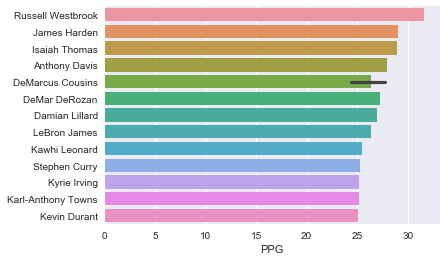

In [90]:
core_players['ppg'] = core_players.PTS/core_players.G
sorted_players = core_players.sort_values('ppg', ascending=False)
print(sorted_players['Player'].values[0:15])
ax =sns.barplot(sorted_players['ppg'].values[0:15],sorted_players['Player'].values[0:15])
ax.set_xlabel("PPG")

Firstly we look at **Win Shares(WS)** and how they relate to a player's points per game(ppg)

"**Win Shares** is a player statistic which attempts to divvy up credit for team success to the individuals on the team" - [Basketball Reference](https://www.basketball-reference.com/about/ws.html)

Text(0.5,1,'WS vs PPG')

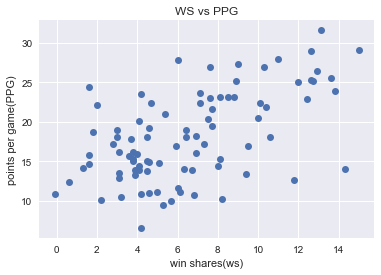

In [91]:
plt.plot(core_players.WS.values, 
         (core_players['PTS']/core_players['G']).values, 'o')
plt.xlabel("win shares(ws)")
plt.ylabel("points per game(PPG)")
plt.title("WS vs PPG")

It seems like there is some correlation between the two. Let's have a look

In [92]:
from scipy.stats.stats import pearsonr
pearsonr(core_players.WS.values, 
         (core_players['PTS']/core_players['G']).values)

(0.5649794501811377, 8.041574653480185e-09)

Just as in the plot, the win shares and points per game are correlated. The data is largely scattered though. Some players who score less than the scoring leaders have higher win shares. Maybe this is were things like Assists per game come in. Let's have a quick look

(0.41710619085846473, 4.776450264532594e-05)

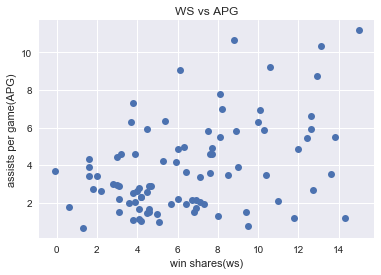

In [93]:
plt.plot(core_players.WS.values, 
         (core_players['AST']/core_players['G']).values, 'o')
plt.xlabel("win shares(ws)")
plt.ylabel("assists per game(APG)")
plt.title("WS vs APG")
pearsonr(core_players.WS.values, 
         (core_players['AST']/core_players['G']).values)

There seems to be a contribution made by assists to win shares, although the correlation is not largely positive 

The next statistic we would like to look at is **box plus/minus**. According to [Basketball Reference](https://www.basketball-reference.com/about/ws.html), "**Box Plus/Minus (BPM)** is a box score-based metric for evaluating basketball players' quality and contribution to the team."

Text(0.5,1,'BPM vs WS')

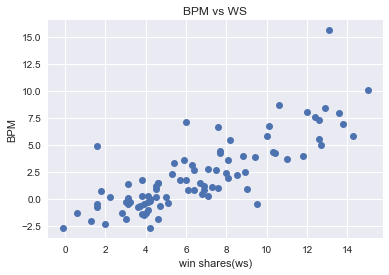

In [94]:
plt.plot(core_players.WS.values, 
         core_players['BPM'], 'o')
plt.xlabel("win shares(ws)")
plt.ylabel("BPM")
plt.title("BPM vs WS")

looking at the data there seems to be a positive correlation between win shares and box plus/minus, let's run pearson's correlation coefficient to check this

In [95]:
pearsonr(core_players.WS.values,core_players.BPM)

(0.8088340280100841, 9.093584164911727e-22)

No surprise, pearson's correlation is quite high, which shows that the is a relationship between the two. Could it be that BPM is related to the number of points as well, by the transitive property? Let's have a look

(0.5755050031966296, 3.6453669903113444e-09)

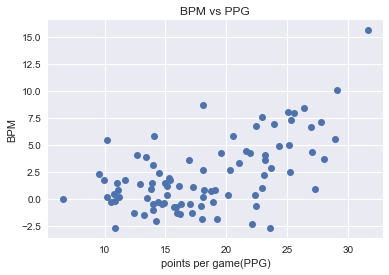

In [96]:
plt.plot((core_players['PTS']/core_players['G']).values,core_players.BPM.values, 'o')
plt.ylabel("BPM")
plt.xlabel("points per game(PPG)")
plt.title("BPM vs PPG")
pearsonr((core_players['PTS']/core_players['G']).values,core_players.BPM)

So logically speaking players who score more for their teams end up with a higher BPM and WS.
Let's just take a look at the players who led the BPM score in 2017

Text(0.5,0,'BPM')

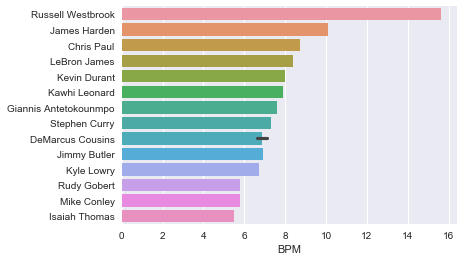

In [97]:
sorted_players = core_players.sort_values('BPM', ascending=False)
bpm_pg = sorted_players.BPM

ax =sns.barplot(bpm_pg.values[0:15],sorted_players['Player'].values[0:15])
ax.set_xlabel("BPM")

Interesting to note that Russell Westbrook is the player with highest BPM.

**UP NEXT... PER**

'The **Player Efficiency Rating (PER)** is a per-minute rating developed by ESPN.com columnist John Hollinger. In John's words, "The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance."' - [Basketball Reference](https://www.basketball-reference.com/about/ws.html)

Is PER also related to the previously discussed statistics as well?

(0.8345548063219889, 3.0368033749387045e-24)

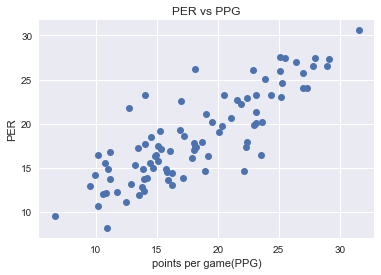

In [98]:
plt.plot((core_players['PTS']/core_players['G']).values,core_players.PER.values, 'o')
plt.ylabel("PER")
plt.xlabel("points per game(PPG)")
plt.title("PER vs PPG")
pearsonr((core_players['PTS']/core_players['G']).values,core_players.PER)

PER has a positive correlation with points per game, I guess we can now assume given the evidence that it is positively correlated to BPM and WS as well... Let's just look at who is leading the PER race.

Text(0.5,0,'PER')

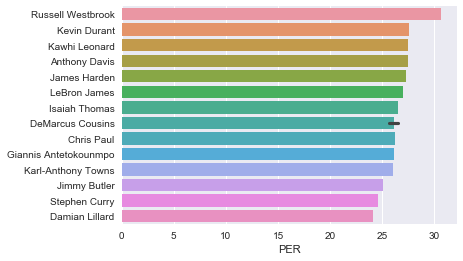

In [99]:
sorted_players = core_players.sort_values('PER', ascending=False)
bpm_pg = sorted_players.PER

ax =sns.barplot(bpm_pg.values[0:15],sorted_players['Player'].values[0:15])
ax.set_xlabel("PER")

Once again Russell Westbrook is the leader in this category

Below is a function to rate players by PER, this rating system was introduced by John Hollinger , [Holligers player efficiency rating](https://en.wikipedia.org/wiki/Player_efficiency_rating)

In [100]:
def mvpCandidate(x):
    if x >= 35.0:
        return 'All-Time Great Season'
    elif x >= 30.0:
        return 'Runaway MVP'
    elif x >= 27.5:
        return 'Strong MVP candidate'
    elif x >= 25:
        return 'Weak MVP candidate'
    else:
        return 'Not MVP candidate'

In [101]:
core_players['MVP candidacy'] = core_players['PER'].apply(mvpCandidate)
mvps = core_players.sort_values("PER", ascending=False).reset_index()
print('2017 MVP according to the PER rating is: '+ mvps.loc[0].Player)

2017 MVP according to the PER rating is: Russell Westbrook


The data from 2017 reveals that, the player with the heighest PER won the mvp award in 2017

In [102]:

for i in np.arange(2006,2018)[::-1]:
    core_players = crop_data.loc[int(i)]
    core_players = core_players[core_players.MP/core_players.G >= 30]
    core_players['MVP candidacy'] = core_players['PER'].apply(mvpCandidate)
    mvps = core_players.sort_values("PER", ascending=False).reset_index()
    print("******" ,i ,"******")
    print(mvps.loc[0]['Year'], " ",mvps.loc[0]['Player'], " is a "+mvpCandidate(mvps.loc[0]['PER']))
    print(mvps.loc[1]['Year'], " ",mvps.loc[1]['Player'], " is a "+mvpCandidate(mvps.loc[1]['PER']) )
    print(mvps.loc[2]['Year'], " ",mvps.loc[2]['Player'], " is a "+mvpCandidate(mvps.loc[2]['PER']) )

****** 2017 ******
2017.0   Russell Westbrook  is a Runaway MVP
2017.0   Kevin Durant  is a Strong MVP candidate
2017.0   Kawhi Leonard  is a Strong MVP candidate
****** 2016 ******
2016.0   Stephen Curry  is a Runaway MVP
2016.0   Kevin Durant  is a Strong MVP candidate
2016.0   Russell Westbrook  is a Strong MVP candidate
****** 2015 ******
2015.0   Anthony Davis  is a Runaway MVP
2015.0   Russell Westbrook  is a Strong MVP candidate
2015.0   Stephen Curry  is a Strong MVP candidate
****** 2014 ******
2014.0   Kevin Durant  is a Strong MVP candidate
2014.0   LeBron James  is a Strong MVP candidate
2014.0   Kevin Love  is a Weak MVP candidate
****** 2013 ******
2013.0   LeBron James  is a Runaway MVP
2013.0   Kevin Durant  is a Strong MVP candidate
2013.0   Chris Paul  is a Weak MVP candidate
****** 2012 ******
2012.0   LeBron James  is a Runaway MVP
2012.0   Chris Paul  is a Weak MVP candidate
2012.0   Dwyane Wade  is a Weak MVP candidate
****** 2011 ******
2011.0   LeBron James  is 

<img src="Screenshot_1.png" width = "600">

data obtained from [NBA](http://www.nba.com/history/awards/mvp)

Using PER we we can see that players who are typically in the top 3 in terms of PER win the MVP award, with the exception of the guys highlighted in red.

## Conclusion
We can see that PER is plays the large impact in the selection of the NBA's MVP. According to our findings essentially the players  contribute the most in terms of points and assists, amongst other things, tend to win the MVP. However, it will become controversial in the coming years since the NBA has now included fan voting for MVP selection

Cleary we can see there is no apparent relatioship between 3PT shooting percentage and age

## Big Men Can't Shoot
<p>
<img src="dwight.jpg" width = "600" >
<em>Dwight howard</em>
</p>

image obtained [here](http://pickandpop.net/2016/07/why-cant-they-make-a-free-throw/)

It is a common notion in the NBA that the taller players typically playing either at Center or Power Forward cannot shoot the basketball. We want to investigate this.

We want took look at their Free throw attempts and the 3 Point attempts, we will leave out the 2 Point attempts because it is ambiguous(because a player can make it through a lay-up or a jumpshot, and we can't really consider lay-ups as shooting)

In [103]:
crop_data.Pos.unique()

array(['C', 'PF', 'PG', 'SG', 'SF', 'SG-PG', 'SF-SG', 'SG-SF', 'C-PF',
       'PF-C', 'SF-PF', 'PG-SG', 'PF-SF', 'PG-SF', 'SG-PF', 'C-SF'],
      dtype=object)

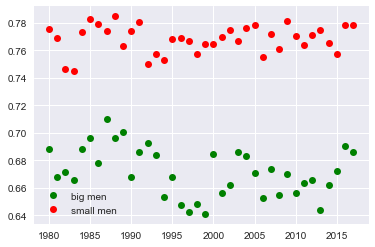

In [104]:
#BIG MEN (Your Forwards)
Centers = crop_data[crop_data.Pos == 'C']
Centers = Centers.append( crop_data[crop_data.Pos == 'C-PF'])
Centers = Centers.append( crop_data[crop_data.Pos == 'PF-C'])
Centers = Centers.append( crop_data[crop_data.Pos == 'PF'])
Centers = Centers[Centers.index >= 1980 ]
Centers = Centers.groupby(Centers.index.get_level_values(0)).mean()

#SMALL MEN(The Guards)
plt.plot(Centers.index.values, Centers['FT%'].values, 'o',color='g')
small_men = crop_data[crop_data.Pos == 'PG']
small_men = small_men.append( crop_data[crop_data.Pos == 'PG-SG'])
small_men = small_men.append( crop_data[crop_data.Pos == 'SG-PG'])
small_men = small_men.append( crop_data[crop_data.Pos == 'SG'])

small_men = small_men[small_men.index >= 1980 ]
small_men = small_men.groupby(small_men.index.get_level_values(0)).mean()
# Centers = C_by_year['FT%']
plt.plot(small_men.index.values, small_men['FT%'].values, 'o',color='r')
plt.legend(['big men', 'small men'],loc='best')

Looks like over history we see that it is true, big men aren't that good free throw shooters when compared to guards...

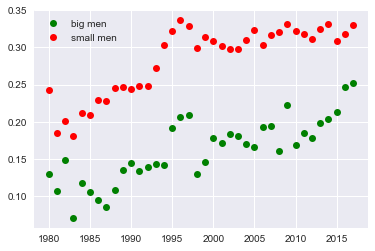

In [105]:
#BIG MEN (Your Forwards)

#SMALL MEN(The Guards)
plt.plot(Centers.index.values, Centers['3P%'].values, 'o',color='g')
plt.plot(small_men.index.values, small_men['3P%'].values, 'o',color='r')
plt.legend(['big men', 'small men'],loc='best')

Looking at the 3 Point percentage over history it still shows that guards are better shooters than big men. It is interesting to see how much big men have improved over days

## Conclusion

If we define not being able to shoot as being worse shooters than guards, then it it true that big men can't shoot.

## Looking at a bunch of other things

In [106]:
from scipy.stats.stats import pearsonr


def plot_and_stats(year):
    data = crop_data.loc[year]
    data = data[data['3PA'] > 0]
    data = data[data['3P'] > 0]
    data = data[np.isfinite(data['3PA'])]
    data = data[~data['3PA'].isnull()]
    sg = data[data.Pos == 'SG']
    sg = sg.groupby('Player')[['3P','3PA']].sum()
    age = data[data.Pos == 'SG'].groupby('Player').first()['Age']
    plt.plot(age, sg['3P']/sg['3PA'], 'o', color='blue' )
    print("The correlation coefficient and statistical significance : ", pearsonr(age, sg['3P']/sg['3PA']))

The correlation coefficient and statistical significance :  (0.10075448279181189, 0.323576096510396)


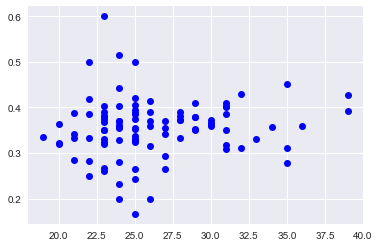

In [107]:
plot_and_stats(2017)

Seens like there isn't a relationship between age and shooting ability

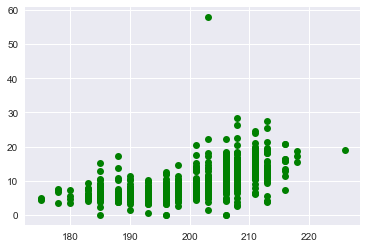

In [108]:
plt.plot(df.loc[2015]['height'].values, df.loc[2015]['TRB%'], 'o',color='green')

There seems to be a relationship seems to relationship between height and the total rebounnd percentage by players.
Let's calculate the correlation co-eiffient to verify this. 

In [109]:
df_clean = df.loc[2017][['TRB%','height']].dropna()
df_clean = df_clean[df_clean['TRB%'] != 0]
# df_clean = df_clean[df_clean['TRB%'] != 1]
pearsonr(df_clean['height'].values, df_clean['TRB%'])

(0.6064169302692384, 1.5706347683528562e-60)

As we can see there is an actual relationship between the variables, this occurence is has a very slim chance of having being produce by randomness in the data

From the data it appears that there is no relationship between height and shooting ability